In the United States, the magnetic and electric fields of transmission lines are not nationally regulated. However, some states have their own set of regulations as to their maximum values within the right-of-way and/or at the edge of the right-of-way. For example, in the state of <a href='https://www.flrules.org/gateway/readFile.asp?sid=0&tid=0&cno=62-814&caid=1028702&type=4&file=62-814.doc'>Florida</a>, for new 500kV or greater transmission lines, the maximum electric and magnetic fields at the edge of the right-of-way, 1 meter above ground, are 5.5 kV/m and 250 mG, respectively. In addition, the maximum electric field within the right-of-way is 15 kV/m at 1 meter above the ground. To provide a clearer picture of what goes into these calculations, this post breaks down the steps necessary to calculate the magnetic and electric fields of a transmission line using 2D calculations.

<!--excerpt-->

### Magnetic Field Calculations

Magnetic field calculations require the following input parameters:

* The position of each phase ($ x_k, y_k $). Here, $ y_k $ is the height of the phase above ground assuming level terrain. If a phase consists of bundled conductor, this position is usually taken to be the centroid of the bundle. For right-of-way calculations, the value of $ y_k $ should account for the wire sag, as the minimum height will yield the worst case results near the ground.
* The RMS current passing through each phase, $I$, along with its phase angle, $\phi$.

#### Step 1: Decompose the Currents into Real and Reactive Components
For magnetic field calculations, the RMS current for each phase must be decomposed to its real and reactive (imaginary) parts based on its phase angle. This is done by using the equation:

$$ I_{p} = I (\cos\phi + j \sin\phi) $$

where

* $ I $ = the RMS current in the phase
* $ \phi = $ the phase angle

For 3 phase systems with A, B, and C phases, the phases should be separated by 120 degrees. In an A lags B lags C system, one set of phase angles would be 0, 120, and 240 degrees. If currents, for say, two different circuits, travel in opposite directions, a negative current should be applied for one of the circuits.


#### Step 2: Calculate the Magnetic Field  Vector for Each Phase

For the purpose of this post, we will assume that each phase consists of an infinite linear element, as would simulate the case of a long, straight line. This isn't, of course, always the case. For instance, regions near line angles or where transmission lines cross are not suitably represented by this assumption and require more complex 3D calculations. For this simple 2D case, the magnetic field vector is:

$$ B = \frac{\mu_0 I_p}{2 \pi r^2} [-(y - y_k) \hat{i} + (x - x_k) \hat{j}] $$

where

* $ x, y = $ the x and y coordinates of the point where the field is to be calculated
* $ x_k, y_k = $ the x and y coordinates of the phase position
* $ r = $ the distance between the phase and point
* $ \mu_0 = $ the magnetic field permeability constant of the space between the points. For air, this is usually taken as $ 4 \pi 10^{-7} \text{H / m}$.

#### Step 3: Calculate the Resultant Magnetic Field

Sum the vectors calculated during Step 2 together to acquire the total magnetic field vector. From this vector, the magnitude of the magnetic field can be calculated as follows:

$$ B_r = \sqrt{B_{x_r}^2 + B_{x_i}^2 + B_{y_r}^2 + B_{y_i}^2} $$

where
* $ B_{x_r}, B_{x_i} = $ the real and reactive components of the magnetic field in the x direction
* $ B_{y_r}, B_{y_i} = $ the real and reactive components of the magnetic field in the y direction

### Electric Field and Space Potential Calculations

Electric field and space potential calculations required the following input parameters:

* The position of the centroid of each phase or center of every phase wire ($ x_k, y_k $). Like the magnetic field calculations, $ y_k $ is the height above ground assuming level terrain.
* The diameter of the wire $ d_b $ used for each phase. For simplified calculations, the number of wires in each phase $ n $ and bundle spacing $ s $ must be known for bundles. Alternately, the center of each wire in the bundle must be known.
* The phase-to-phase, $ V_{pp} $, or phase-to-ground voltages for each phase, as well as their phase angles, $ \phi $.


#### Step 1: Decompose the Voltages into Real and Reactive Components

If the voltages for each phase are phase-to-phase instead of phase-to-ground, they must be converted to phase-to-ground. For 3 phase systems, this is done by dividing the phase-to-phase voltage by $\sqrt{3}$. An over-voltage factor should also be considered depending on the applied standards. From there, the phase-to-ground voltage must be broken into its real and reactive components based on the phase angle. These operations, when combined, result in the following equation for the phase-to-ground voltage for 3 phase system:

$$ V_{pg} = \frac{V_{pp}}{\sqrt{3}} (\cos\phi + j \sin\phi) $$

where

* $ V_{pp} $ = the phase-to-phase voltage for a 3 phase system
* $ \phi = $ the phase angle


#### Step 2: Calculate the Equivalent Diameters for Bundled Phases

For phases consisting of bundled wires, two approaches are possible:

1. Perform the subsequent calculations for each wire in the bundled phases independently.
2. Calculate an equivalent phase diameter for each bundled phase and perform the subsequent calculations using those diameters instead of performing calculations for each individual wire.

The first method requires more calculations be performed but works for complex bundle configurations for which an equivalent bundled diameter is not readily calculated. The second method is faster for typical scenarios.

For bundles in a circular configuration with equal spacing, the equivalent diameter can be calculated using the below equations:

$$ d_b = \frac{s}{\sin(\pi/n)} $$

and

$$d_{eq} = \big(n d d_b^{n-1}\big)^{1/n} $$

where

* $n =$ the number of wires in the bundle
* $s =$ the spacing between wires in the bundle
* $d_b =$ the calculated bundle diameter
* $d =$ the diameter of each wire
* $d_{eq} = $ the equivalent diameter

If the phase consists of a single wire, the above calculation is not required, and the diameter can be taken as simply that of the wire.

#### Step 3: Assemble the Potential Matrix and Solve for the Phase Charges

The charges of each phase are required for calculating the electric field. These values can be calculated by the matrix equation:

$$ Q = P^{-1} V_{pg} $$

where

* $ Q =$ a vector of charges for the phases
* $ P^{-1} =$ the inverse of the potential of each phase to itself and to every other phase
* $ V_{pg} =$ a vector of phase-to-ground voltages for the phases

The potential matrix is a symmetric matrix. The potentials along the main diagonal are the potential between each phase and itself, while the other values are the potentials between each phase and every other phase. The potential between the phase and itself is calculated as:

$$ P_{kk} = \frac{1}{2\pi\epsilon} \ln{\frac{4 y_k}{d_k}} $$

The potential between a phase and another phase is calculated as:

$$ P_{kl} = \frac{1}{2\pi\epsilon} \ln{\sqrt{\frac{r_{kil}^2}{r_{kl}^2}}} $$

where

* $ r_{kl}^2 = (x_l - x_k)^2 + (y_k - y_l)^2 =$ the square distance between phase $k$ and phase $l$
* $ r_{kil}^2 = (x_l - x_k)^2 + (y_k + y_l)^2 =$ the square distance between phase $k$ and the image of phase $l$

Here, $(x_k, y_k)$ are the coordinates for the position of phase $k$, $(x_l, y_l)$ are the coordinates for the position of phase $l$, and $\epsilon$ is the electric permittivity of the space, while is typically taken as $ 8.854 * 10^{-12} \text{ F / m} $ for air. When constructed, the potential matrix will look something like:

$$
P =
\begin{bmatrix}
P_{11} & P_{12} & ... & P_{1l} \\
 & P_{22} & ... & P_{2l} \\
 &  & ... & ... \\
sym. &  &  & P_{kk}
\end{bmatrix}
$$

Taking the inverse of the matrix, the charges can be calculated using the equation at the beginning of this section.

#### Step 4: Calculate the Electric Field and Space Potential for Each Phase


Once the values for the charges are acquired, the electric field vector can be calculated at a point $(x, y) $ using the equation:

$$ E = \frac{Q_{k}}{2\pi\epsilon} \bigg[\bigg(\frac{x - x_k}{r_{k}^2} - \frac{x - x_k}{r_{i}^2}\bigg)\hat{i} + \bigg(\frac{y - y_k}{r_{k}^2} - \frac{y + y_k}{r_{i}^2}\bigg)\hat{j} \bigg]$$

The space potential may also be calculated as:

$$ V = \frac{Q_{k}}{2\pi\epsilon} \ln{\sqrt{\frac{r_{i}^2}{r_{k}^2}}}$$

where

* $ r_{k}^2 = (x - x_k)^2 + (y_k - y)^2 =$ the square distance between the point and phase
* $ r_{i}^2 = (x - x_k)^2 + (y_k + y)^2 =$ the square distance between the point and image of the phase

#### Step 5: Calculate the Electric Field Resultant and Total Space Potential

Sum the vectors calculated during Step 4 together to acquire the total electric field vector. From this vector, the magnitude of the electric field can be calculated as follows:

$$ E_r = \sqrt{E_{x_r}^2 + E_{x_i}^2 + E_{y_r}^2 + E_{y_i}^2} $$

where
* $ E_{x_r}, E_{x_i} = $ the real and reactive components of the electric field in the x direction
* $ E_{y_r}, E_{y_i} = $ the real and reactive components of the electric field in the y direction

The total space potential can also be acquired by simply summing the space potentials developed by each phase at that point.

### Calculations and Visualizations using EMF Package

#### Geometry

The geometry and parameters for the example are defined below:

<IPython.core.display.Javascript object>


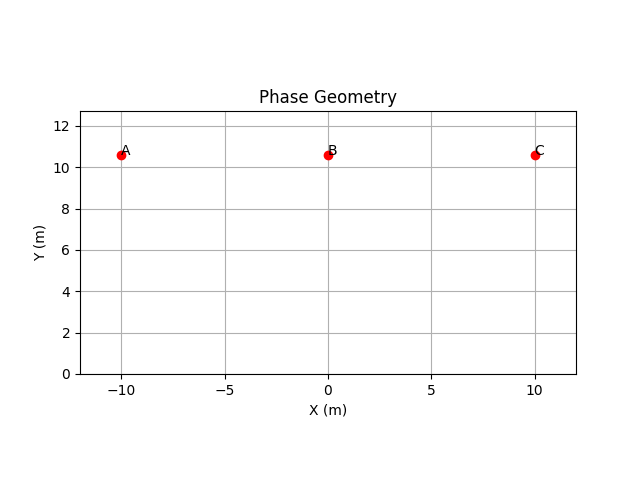

In [1]:
%matplotlib notebook
import numpy as np
from emf import Phase2D, EMFAnalysis2D

phases = [
    # name, x, y, wire diameter, voltage, current, phase angle, # wires, spacing
    Phase2D('A', -10, 10.6, 0.033, 525000, 1000, 120, 3, 0.45),
    Phase2D('B', 0, 10.6, 0.033, 525000, 1000, 0, 3, 0.45),
    Phase2D('C', 10, 10.6, 0.033, 525000, 1000, -120, 3, 0.45)
]

emf = EMFAnalysis2D(phases)
emf.plot_geometry();

#### Magnetic Field

The magnetic field profile show below includes a dashed line indicating the maximum magnetic field limit required at the edge of the right-of-way by the state of Florida for transmission lines greater than 500kV. Notice that this limit is not exceeded for this example.

In [2]:
b = emf.net_magnetic_field(-20, 1) * 1e7

# Magnetic field limit
b_lim = 250

print('ROW Edge Magnetic Field (mG): {:.2f}'.format(b))
print('Max Field < {} mG limit: {}'.format(b_lim, b < b_lim))

ROW Edge Magnetic Field (mG): 81.98
Max Field < 250 mG limit: True


<IPython.core.display.Javascript object>


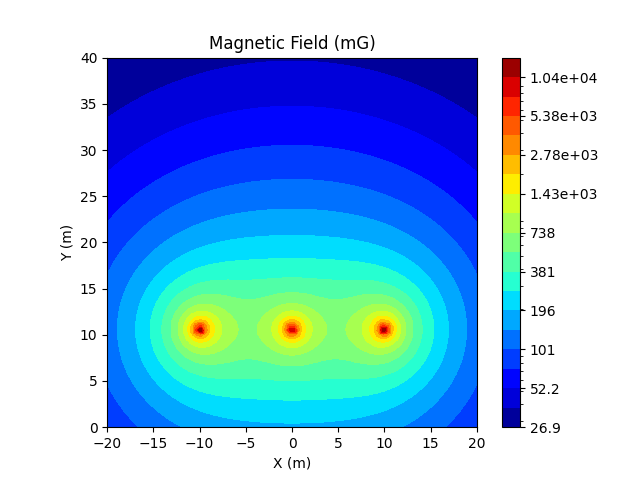

<IPython.core.display.Javascript object>


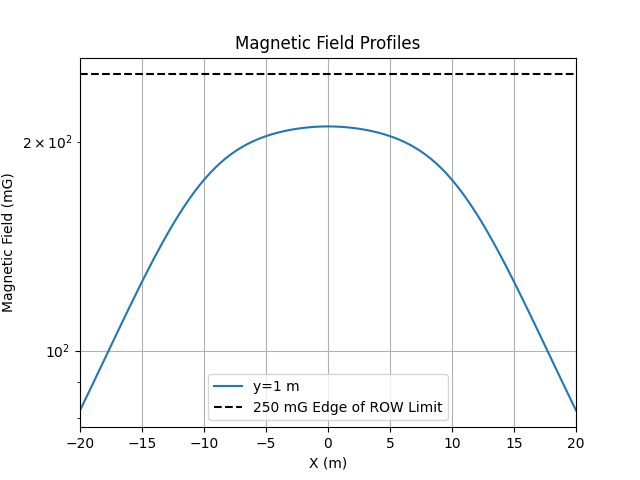

In [3]:
emf.plot_mag_field_contours(
    xs=np.linspace(-20, 20, 100),
    ys=np.linspace(0, 40, 100)
)

ax = emf.plot_mag_field_profiles(
    xs=np.linspace(-20, 20, 100),
    ys=[1]
);

ax.plot([-20, 20], [250, 250], 'k--', label='250 mG Edge of ROW Limit')
ax.legend();

#### Electric Field

The electric field profile show below includes dashed lines indicating the maximum electric field limit required at the edge of the right-of-way by the state of Florida for transmission lines greater than 500kV, as well as the maximum electric field within the right-of-way. Notice that the maximum field is not exceeded for this example. In addition, the electric field dips below the field limits at the edge of the right-of-way at 20 m.

In [4]:
e = [emf.net_electric_field(x, 1) for x in np.linspace(-20, 20, 100)]
e_edge = e[0] / 1000
e_max = max(e) / 1000

# Electric field limits
e_max_lim = 15
e_lim = 5.5

print('ROW Edge Electric Field (mG): {:.2f}'.format(e_edge))
print('Max Electric Field (mG): {:.2f}'.format(e_max))
print('Edge Max Field < {} kV/m limit: {}'.format(e_lim, e_edge < e_lim))
print('Max Field < {} kV/m limit: {}'.format(e_max_lim, e_max < e_max_lim))

ROW Edge Electric Field (mG): 4.86
Max Electric Field (mG): 8.96
Edge Max Field < 5.5 kV/m limit: True
Max Field < 15 kV/m limit: True


<IPython.core.display.Javascript object>


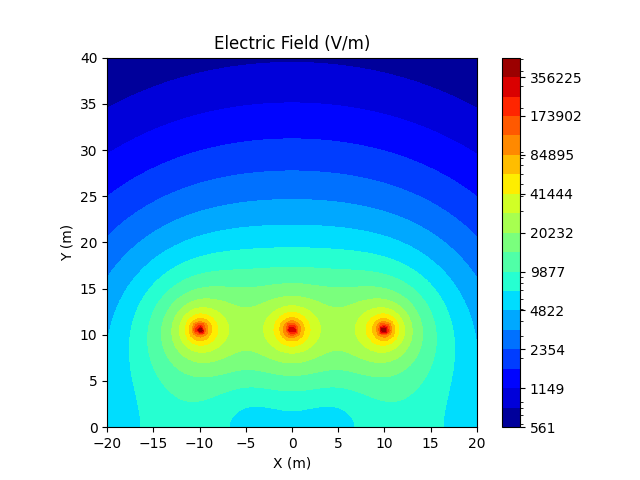

<IPython.core.display.Javascript object>


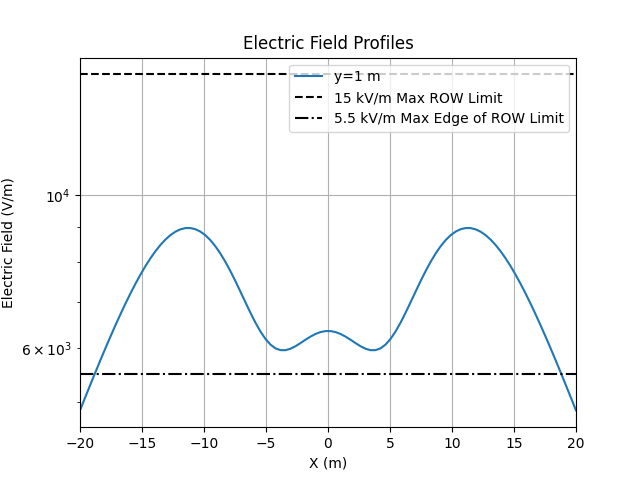

In [5]:
emf.plot_elec_field_contours(
    xs=np.linspace(-20, 20, 100),
    ys=np.linspace(0, 40, 100)
)

ax = emf.plot_elec_field_profiles(
    xs=np.linspace(-20, 20, 100),
    ys=[1]
)

ax.plot([-20, 20], [15000, 15000], 'k--', label='15 kV/m Max ROW Limit')
ax.plot([-20, 20], [5500, 5500], 'k-.', label='5.5 kV/m Max Edge of ROW Limit')
ax.legend();

#### Space Potential

The state of Florida does not specify space potential limits for transmission lines. However, I have seen recommended limits placed on the space potential for installing ADSS underneath transmission lines so as not to create premature fatigue in the casing. Therefore, it is a value that may be interest for other applications.

<IPython.core.display.Javascript object>


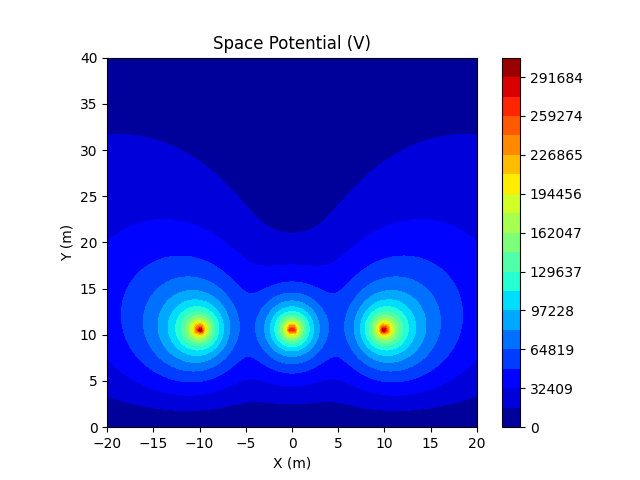

<IPython.core.display.Javascript object>


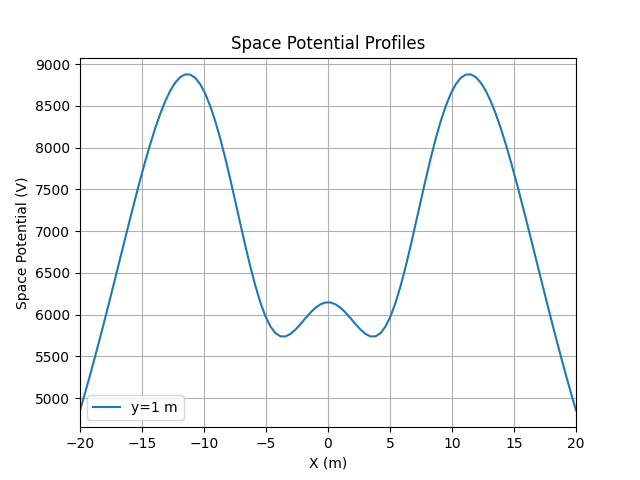

In [6]:
emf.plot_space_potential_contours(
    xs=np.linspace(-20, 20, 100),
    ys=np.linspace(0, 40, 100)
)

emf.plot_space_potential_profiles(
    xs=np.linspace(-20, 20, 100),
    ys=[1]
);

### Attachments

* [EMF Calculations](https://github.com/mpewsey/emf)


### References

[1] EPRI AC Transmission Line Reference Book - 200 kV and Above, 2015 Edition, pp. 7-11 - 7-14, 7-19 - 7-26.